# Dimension Reduction and clustering
# Machine Learning, Exercise 7
 王敏行 id:2018012386 wangmx18@mails.tsinghua.edu.cn
 
**Codes in this document is generated by myself.**

Please see readme.md before running this file.

### data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
# from sklearn.cluster import 
import torchvision as tv
import torch
from torchvision import transforms as tf

# np.random.seed(0)

path = '/data2forEx'
transform = tf.ToTensor()
"""
创建训练集
root -- 数据存放的目录
train -- 明确是否是训练集
download -- 是否需要下载
transform -- 转换器，将数据集进行转换
"""
trainset = tv.datasets.MNIST(
    root=path,
    train=True,
    download=True,
    transform=transform
)

testset = tv.datasets.MNIST(
    root=path,
    train=False,
    download=True,
    transform=transform
)

# load all the samples into the testloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000,shuffle=False)

img_tmp, label_tmp = next(iter(trainloader))

# choose the category for the experiment
number=7
mask_tmp=label_tmp==number
print('number of "{}" is {}'.format(number, len(np.nonzero(mask_tmp))))
data_tmp=img_tmp[mask_tmp]

number of "6" is 5918


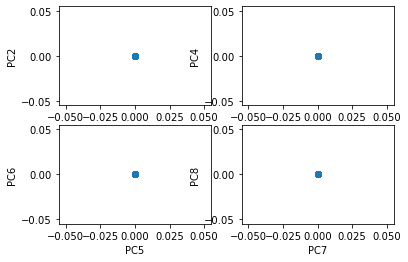

In [2]:
data = data_tmp.reshape(-1,28*28)
# print(len(np.nonzero(data[10]-data_tmp[10,0,:,:].reshape(1,-1))))

def plot_data(data, c=None):
    plt.figure()
    for i in range(4):
        plt.subplot(221+i)
        plt.scatter(data[:,2*i],data[:,2*i+1],c=c)
        plt.xlabel('PC{}'.format(2*i+1))
        plt.ylabel('PC{}'.format(2*i+2))
    # plt.title('original data')
    plt.show()

plot_data(data)

### PCA decomposition

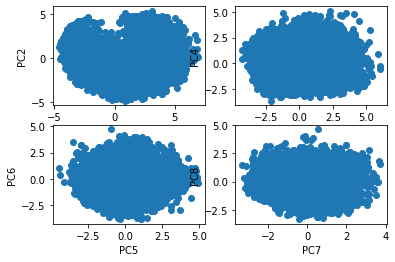

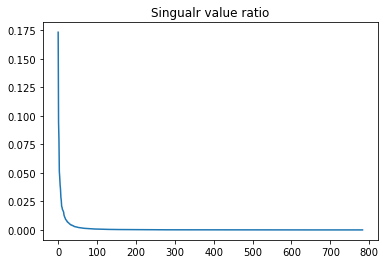

C:\Users\Max\anaconda3\envs\torch\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Max\anaconda3\envs\torch\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


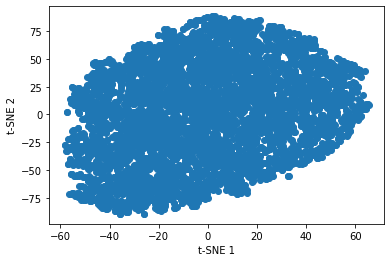

In [19]:
pca=PCA()
pca.fit(data)
PCA_data = pca.transform(data)
plot_data(PCA_data)
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.title('Singualr value ratio')
plt.show()
# print(pca.singular_values_)

tsne_data = TSNE(n_components=2).fit_transform(data)
plt.figure()
plt.scatter(tsne_data[:,0],tsne_data[:,1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [16]:
print(pca.explained_variance_ratio_)

[1.73226155e-01 9.42590105e-02 7.97754694e-02 5.11353385e-02
 4.61440288e-02 3.95365378e-02 3.56890843e-02 2.85753427e-02
 2.58065855e-02 2.04798042e-02 1.98741673e-02 1.78955571e-02
 1.73192558e-02 1.63632107e-02 1.56166102e-02 1.30111018e-02
 1.19070105e-02 1.10013883e-02 1.04395282e-02 9.29153895e-03
 8.87887052e-03 8.39517087e-03 8.12563566e-03 7.20041288e-03
 7.06763270e-03 6.58189658e-03 6.45165482e-03 6.10860292e-03
 5.71516172e-03 5.35809757e-03 5.07965810e-03 4.92014019e-03
 4.63505710e-03 4.33206937e-03 4.27760496e-03 4.27713139e-03
 3.88088831e-03 3.83523759e-03 3.67742846e-03 3.44723663e-03
 3.41418763e-03 3.03686756e-03 2.96432403e-03 2.85924722e-03
 2.78223724e-03 2.70482257e-03 2.64992108e-03 2.62151758e-03
 2.51279555e-03 2.49015724e-03 2.33958860e-03 2.18810535e-03
 2.14456681e-03 2.08850656e-03 2.00494826e-03 1.92881274e-03
 1.88570328e-03 1.85314020e-03 1.80602167e-03 1.75972438e-03
 1.72143848e-03 1.65919844e-03 1.62953204e-03 1.57199450e-03
 1.54998600e-03 1.477504

**It's hardly possible to tell how many clusters are there in the dataset.**

According to the ratio of singular value of PCA decomposition, 20 features are selected for further analysis.

In [21]:
num_feature = 20
dc_data = PCA_data[:,:num_feature]

### k-means clustering

---------------------------------------------
num of cluster is 2
kmeans on original data


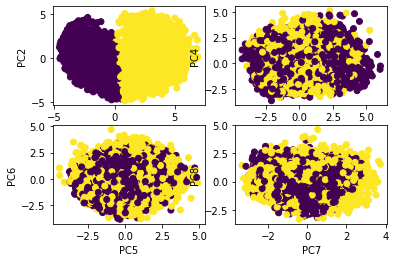

kmeans on PCA decomposed data


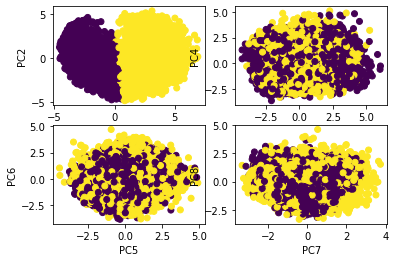

---------------------------------------------
num of cluster is 3
kmeans on original data


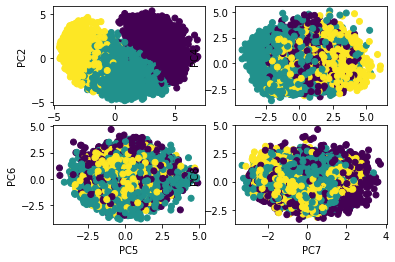

kmeans on PCA decomposed data


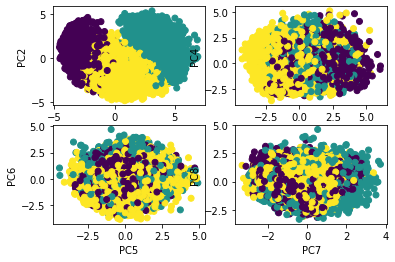

---------------------------------------------
num of cluster is 4
kmeans on original data


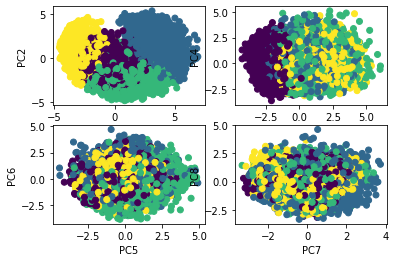

kmeans on PCA decomposed data


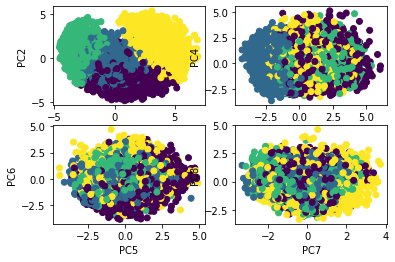

---------------------------------------------
num of cluster is 5
kmeans on original data


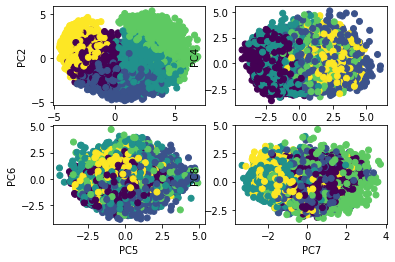

kmeans on PCA decomposed data


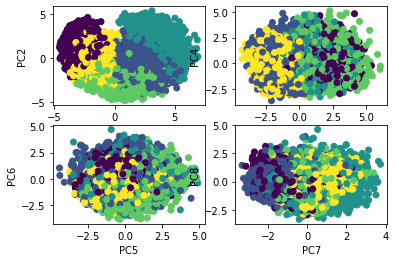

---------------------------------------------
num of cluster is 6
kmeans on original data


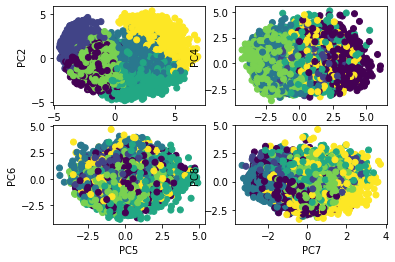

kmeans on PCA decomposed data


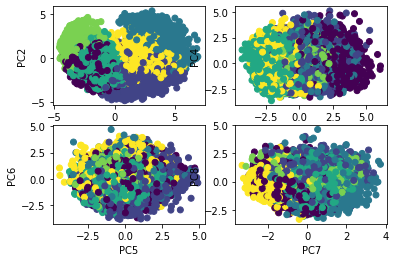

---------------------------------------------
num of cluster is 7
kmeans on original data


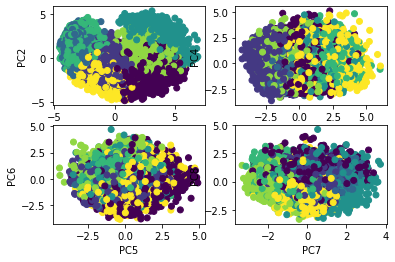

kmeans on PCA decomposed data


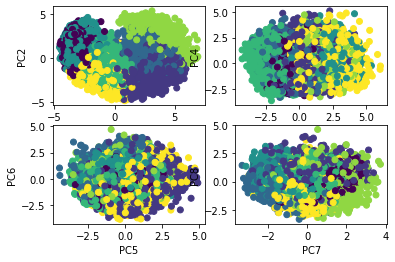

---------------------------------------------
num of cluster is 8
kmeans on original data


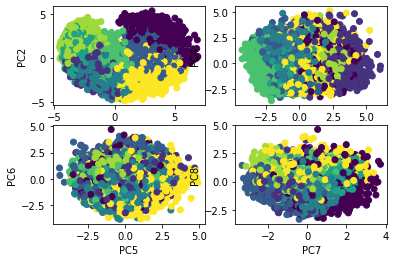

kmeans on PCA decomposed data


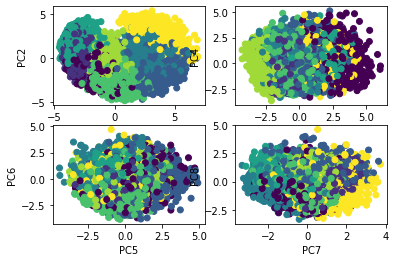

---------------------------------------------
num of cluster is 9
kmeans on original data


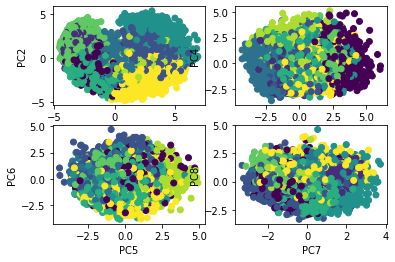

kmeans on PCA decomposed data


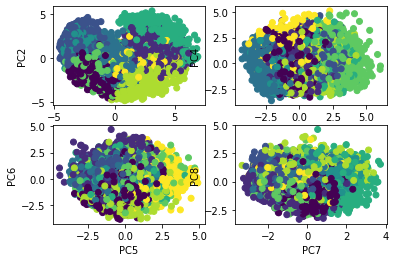

In [22]:
from sklearn.cluster import KMeans
for i in range(2,10):
    cls_1 = KMeans(n_clusters=i).fit(data)
    cls_2 = KMeans(n_clusters=i).fit(dc_data)
    pred_1 = cls_1.predict(data)
    pred_2 = cls_2.predict(dc_data[:,:20])
    
    print('---------------------------------------------\nnum of cluster is {}'.format(i))
    print('kmeans on original data')
    plot_data(PCA_data, pred_1)
    print('kmeans on PCA decomposed data')
    plot_data(PCA_data,pred_2)    

### try another digit

number of "1" is 6742


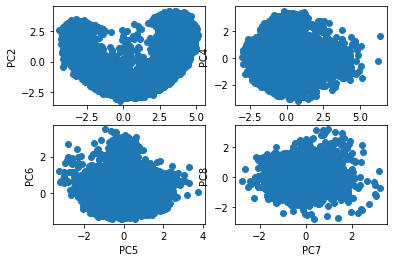

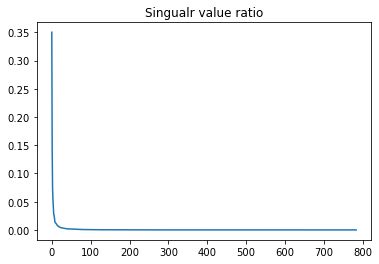

C:\Users\Max\anaconda3\envs\torch\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Max\anaconda3\envs\torch\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


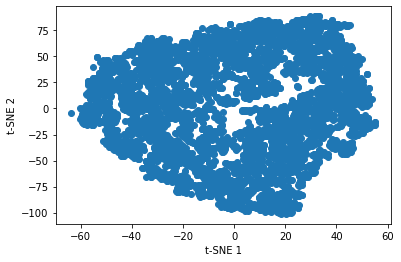

In [25]:
number=1
mask_tmp=label_tmp==number
print('number of "{}" is {}'.format(number, len(np.nonzero(mask_tmp))))
data_tmp=img_tmp[mask_tmp]


data = data_tmp.reshape(-1,28*28)


pca=PCA()
pca.fit(data)
PCA_data = pca.transform(data)
plot_data(PCA_data)
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.title('Singualr value ratio')
plt.show()
# print(pca.singular_values_)

tsne_data = TSNE(n_components=2).fit_transform(data)
plt.figure()
plt.scatter(tsne_data[:,0],tsne_data[:,1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


---------------------------------------------
num of cluster is 2
kmeans on original data


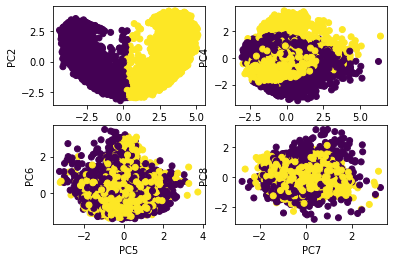

kmeans on PCA decomposed data


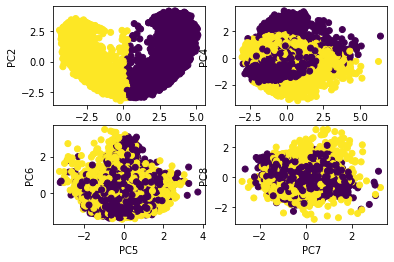

---------------------------------------------
num of cluster is 3
kmeans on original data


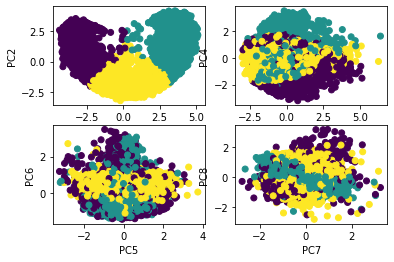

kmeans on PCA decomposed data


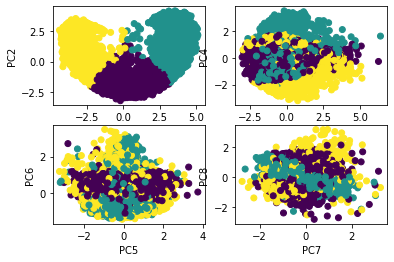

---------------------------------------------
num of cluster is 4
kmeans on original data


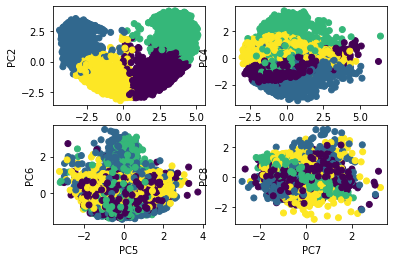

kmeans on PCA decomposed data


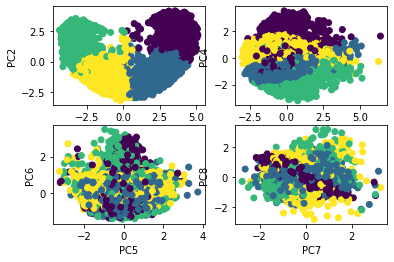

---------------------------------------------
num of cluster is 5
kmeans on original data


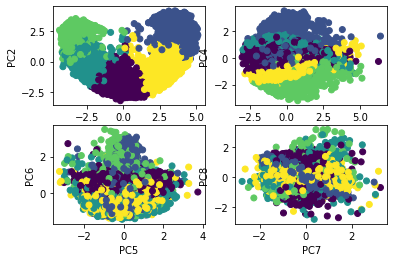

kmeans on PCA decomposed data


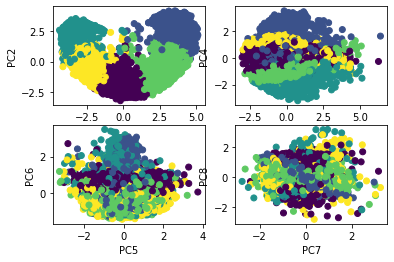

---------------------------------------------
num of cluster is 6
kmeans on original data


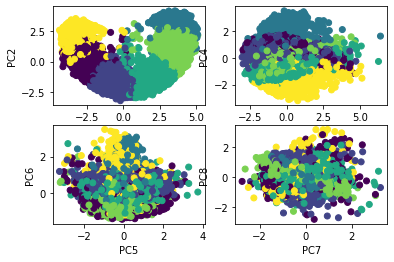

kmeans on PCA decomposed data


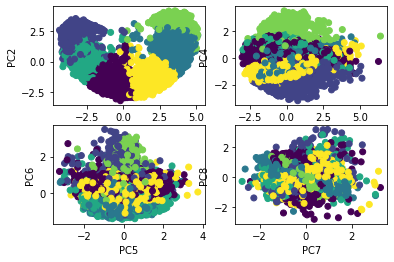

---------------------------------------------
num of cluster is 7
kmeans on original data


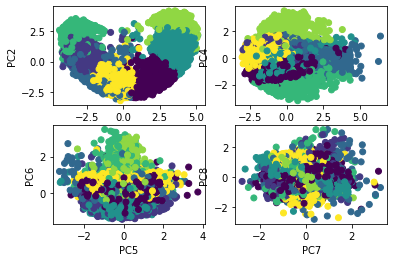

kmeans on PCA decomposed data


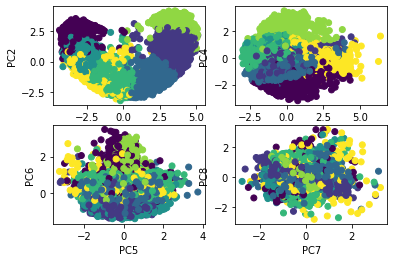

In [30]:
num_feature = 10
dc_data = PCA_data[:,:num_feature]


from sklearn.cluster import KMeans
for i in range(2,8):
    cls_1 = KMeans(n_clusters=i).fit(data)
    cls_2 = KMeans(n_clusters=i).fit(dc_data)
    pred_1 = cls_1.predict(data)
    pred_2 = cls_2.predict(dc_data[:,:20])
    
    print('---------------------------------------------\nnum of cluster is {}'.format(i))
    print('kmeans on original data')
    plot_data(PCA_data, pred_1)
    print('kmeans on PCA decomposed data')
    plot_data(PCA_data,pred_2)

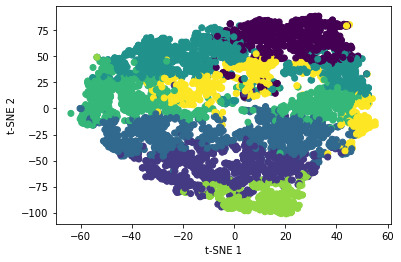

In [31]:
plt.figure()
plt.scatter(tsne_data[:,0],tsne_data[:,1], c=pred_2)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()